# CROP PREDICTION ANALYSIS WITH CLASSIFICATION 

This is an Agricultural Machine Learning Project that is used to help in helping in making predictions and supporting decisions on what crops to grow and what to do during the growing season of the crops.The process of crop prediction starts with the: soil preparation, seeds breeding and water feed measurement and mostly ends with determining the ripeness with the help of computer vision.

In tthis project , we will use the parameters of N-P-K, temperature, humidity, pH value, rainfall, crop from their side and the application will predict which crop should the user grow.

* Potassium (K) – Potassium is a nutrient that helps the overall functions of the plant perform correctly.
* Nitrogen (N) – Nitrogen is largely responsible for the growth of leaves on the plant.
* Phosphorus (P) – Phosphorus is largely responsible for root growth and flower and fruit development.

# IMPORTING LIBRARIES

In [1]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import random

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#import libraries for ML model
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#Dataset Information

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
#Total Columns

crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
#Shape of Dataset

print("The Shape of data:",crop.shape)

The Shape of data: (2200, 8)


In [6]:
print("\nThe total  crops in dataset are:", crop['label'].unique())
print("\nThe total amount of each crop: ",crop['label'].value_counts())


The total  crops in dataset are: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

The total amount of each crop:  rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


- From the list it is shown that there are a total of 22 different crops with a sum of 100 parameters which are specific requirements for each crop to grow.

In [7]:
#Statistics of the crop data

crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [9]:
# Finding null values

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
#Duplicates 

crop.duplicated().sum()

0

In [11]:
#Summary of the crops 

crop_summary = pd.pivot_table(crop, index=['label'], aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [12]:
pd.crosstab(crop['rainfall'], crop['label'], margins=True)

label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon,All
rainfall,,,,,,,,,,,,,,,,,,,,,
20.21126747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20.36001144,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20.39020503,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20.49035619,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20.66127836,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.6094492000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
295.9248796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
298.40184710000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


EXPLORATORY ANALYSIS WITH GRAPHS AND PLOTS 

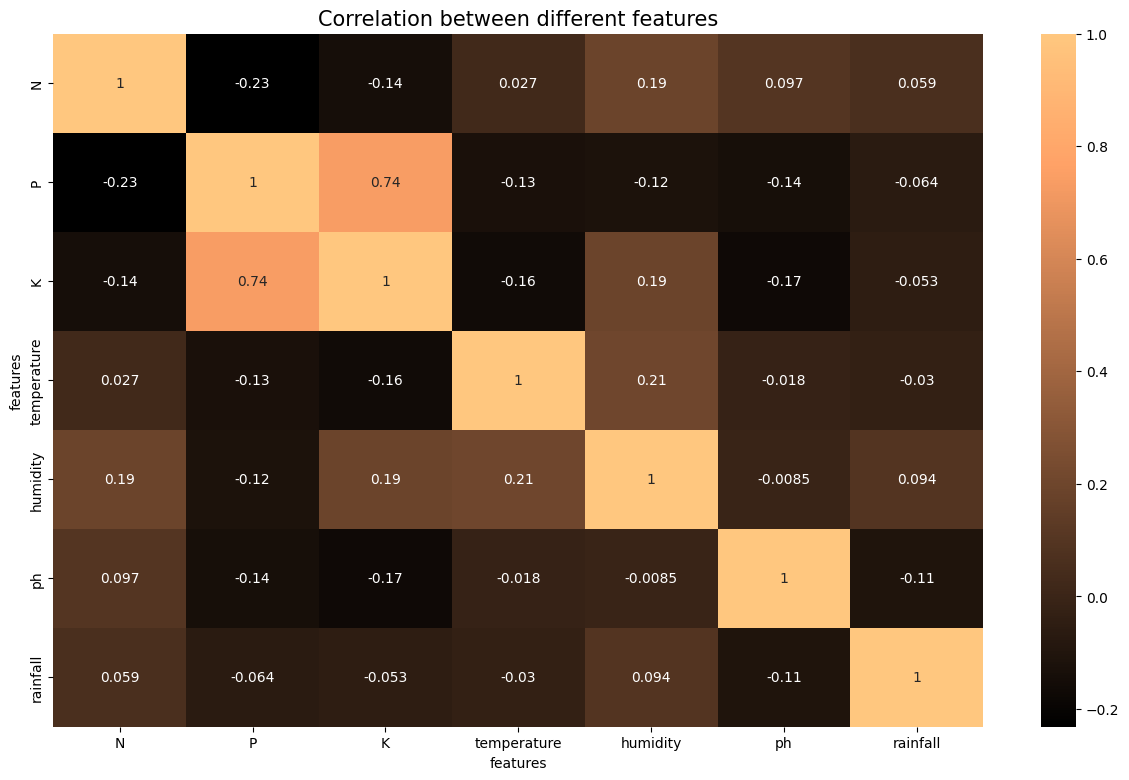

In [13]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
corr = crop.corr()
sns.heatmap(corr, annot=True, cbar=True,cmap='copper')

ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title("Correlation between different features", fontsize = 15, c='black')
plt.show()

In [14]:
#Rainfall Distribution Per Crop

rainfall_per_crop = px.scatter(crop, x='label', y='rainfall')
rainfall_per_crop.show()



In [15]:
# N-P-K Values comparison between crops

fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))


fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


In [16]:
# Humidity Distribution To show crops that need humidity the most to the least

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

humidity_summary = crop_summary.sort_values(by='humidity', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : humidity_summary['humidity'][0:10].sort_values().index,
    'x' : humidity_summary['humidity'][0:10].sort_values()
}

last = {
    'y' : humidity_summary['humidity'][-10:].index,
    'x' : humidity_summary['humidity'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most humidity required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least humidity required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="HUMIDITY DISTRIBUTION",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

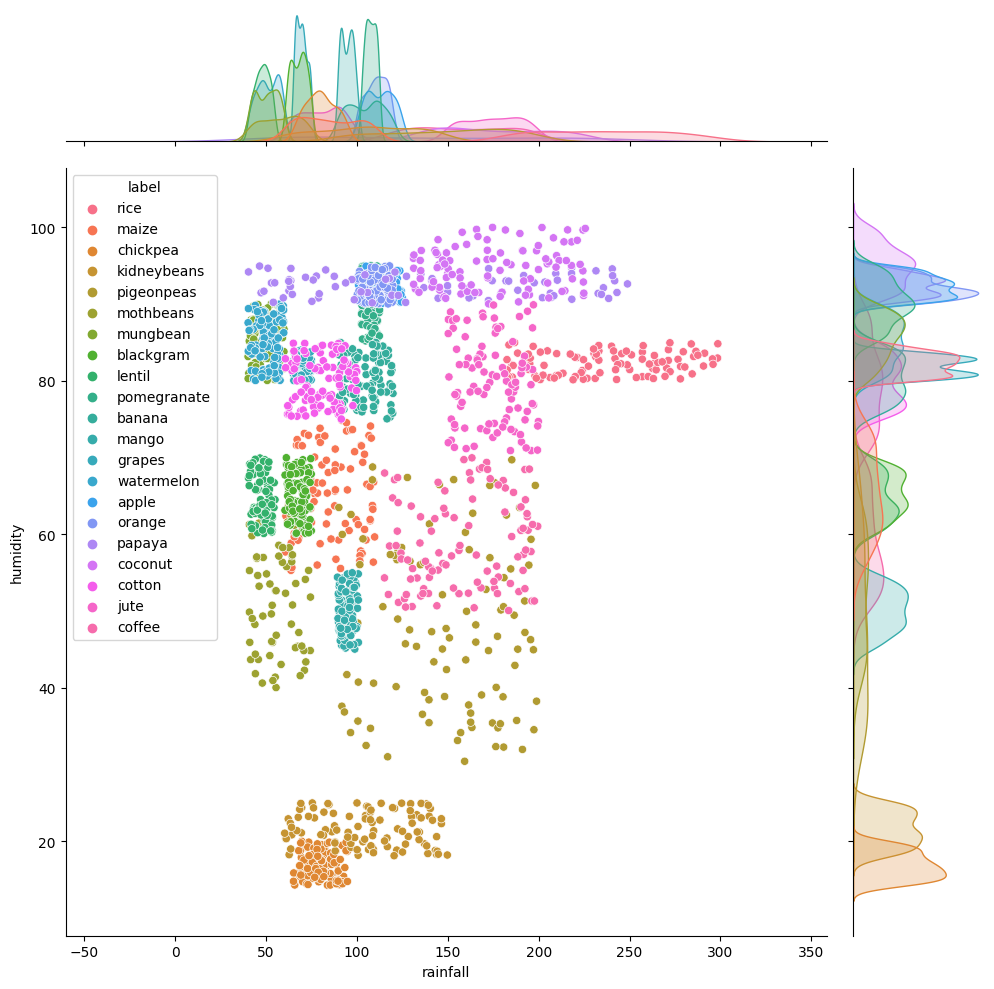

In [17]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & 
                                                  (crop['rainfall']>40)],height=10,hue="label")



In [18]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

kidneybeans_npk = crop_summary[crop_summary.index=='kidneybeans']
values = [kidneybeans_npk['N'][0], kidneybeans_npk['P'][0], kidneybeans_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="KidneyBeans"),1, 2)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 3)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, kidneybeans,  maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='KidneyBeans',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()

# Feature Selection Of Independent and Target variables

In [19]:
X = crop.drop('label', axis=1)
y = crop['label']

In [20]:
acc = []
model = []

In [21]:
# SPLITTING THE DATA

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    shuffle = True, random_state =2)


In [22]:
print("==========================")
print("Train Data Shape")
print(X_train.shape)
print(y_train.shape)
print("===========================")
print("Test Data Shape")
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(1760, 7)
(1760,)
Test Data Shape
(440, 7)
(440,)


In [23]:
# Scale the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [24]:
X_train

array([[0.80714286, 0.23571429, 0.1       , ..., 0.76071051, 0.60393611,
        0.25238444],
       [0.2       , 0.21428571, 0.085     , ..., 0.84542489, 0.56790336,
        0.14256792],
       [0.07857143, 0.4       , 0.08      , ..., 0.10209972, 0.31527862,
        0.41384053],
       ...,
       [0.16428571, 0.24285714, 0.085     , ..., 0.7899586 , 0.52253655,
        0.07841231],
       [0.83571429, 0.54285714, 0.24      , ..., 0.74592957, 0.31147497,
        0.28007559],
       [0.27857143, 0.13571429, 0.045     , ..., 0.89407786, 0.57298809,
        0.30863709]])

In [25]:
# STANDARIZATION

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [26]:
X_train

array([[ 1.69991833, -0.48450066, -0.46654299, ...,  0.36534732,
         1.20356233, -0.23551865],
       [-0.60720953, -0.57443434, -0.52452593, ...,  0.69004063,
         0.90389393, -0.79201637],
       [-1.0686351 ,  0.20499088, -0.54385357, ..., -2.15897647,
        -1.19707381,  0.58266376],
       ...,
       [-0.74292293, -0.45452277, -0.52452593, ...,  0.4774494 ,
         0.52659831, -1.11712642],
       [ 1.80848906,  0.80454873,  0.07463107, ...,  0.30869492,
        -1.22870711, -0.09519312],
       [-0.30864004, -0.90419116, -0.67914709, ...,  0.87651775,
         0.94618139,  0.04954294]])

# DATA MODELLING CLASSIFICATION ALGORITHMS

DECISION TREES

In [27]:
from sklearn.tree import DecisionTreeClassifier
crop_dt = DecisionTreeClassifier(criterion='entropy', random_state=2, max_depth=5)

crop_dt.fit(X_train, y_train)
crop_dt.score(X_test, y_test) 

0.9

In [28]:
#PREDICTING VALUES 
dt_pred = crop_dt.predict(X_test)

from sklearn.metrics import accuracy_score
x = accuracy_score(y_test, dt_pred)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,dt_pred))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [29]:
# Cross Validation

score = cross_val_score(crop_dt, X, y, cv=5)
print('Cross validation score: ',score)



Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [30]:
#Finding The Accuracy of the Train set and Test set

#Train Accuracy
train_score = crop_dt.score(X_train, y_train)
print("Training accuracy= ", crop_dt.score(X_train, y_train))

#Test Accuracy
test_score = crop_dt.score(X_test, y_test)
print("Testing accuracy= ", crop_dt.score(X_test, y_test))

Training accuracy=  0.8818181818181818
Testing accuracy=  0.9


RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier

crop_rf = RandomForestClassifier(n_estimators=20, random_state=0)
crop_rf.fit(X_train, y_train)
crop_rf.score(X_test, y_test)

0.990909090909091

In [32]:
#Predictions 

rf_pred = crop_rf.predict(X_test)

x = metrics.accuracy_score(y_test, rf_pred)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is: ", x*100)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [33]:
#CROSS VALIDATION

score = cross_val_score(crop_rf, X, y, cv=3)
print("The Cross Validation Score:",score)

The Cross Validation Score: [0.9986376  0.9904502  0.98908595]


In [34]:
#Accuracy Of The Test and Training Sets 
#Train SCore
train_score = crop_rf.score(X_train, y_train)
print("Train Accuracy:", crop_rf.score(X_train, y_train))

#Test Score
test_score = crop_rf.score(X_test, y_test)
print("Testing accuracy = ",crop_rf.score(X_test, y_test))

Train Accuracy: 1.0
Testing accuracy =  0.990909090909091


GAUSSSIAN NAIVE BAYES CLASSIFIER

In [35]:
from sklearn.naive_bayes import GaussianNB
crop_NB = GaussianNB()

crop_NB.fit(X_train, y_train)
crop_NB.score(X_test, y_test)

0.990909090909091

In [36]:
#PREDICTIONS

NB_pred = crop_NB.predict(X_test)
x = metrics.accuracy_score(y_test, NB_pred)
acc.append(x)
model.append('Naive Bayes')

print("Naive Bayes Accuracy is: ", x*100)
print(classification_report(y_test, NB_pred))

Naive Bayes Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [37]:
score = cross_val_score(crop_NB, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [38]:
#Print Train Accuracy
nb_train_accuracy = crop_NB.score(X_train, y_train)
print("Training accuracy = ",crop_NB.score(X_train, y_train))
#Print Test Accuracy
nb_test_accuracy = crop_NB.score(X_test, y_test)
print("Testing accuracy = ",crop_NB.score(X_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


EXTREME GRADIENT BOOSTING 

In [39]:
# Mostly XGBoost models use data that must be encoded before training it whereby thr categorical transformers like labelencoders are used to change categorical daya to numerical data.
#Therefore:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

#Apply the XGBoost model for training
from xgboost import XGBClassifier
crop_XGB = XGBClassifier()
crop_XGB.fit(X_train, y_train)
crop_XGB.score(X_test, y_test)





0.0

In [40]:
#PREDICTIONS

XGB_pred = crop_XGB.predict(X_test)
x = metrics.accuracy_score(y_test, XGB_pred)
acc.append(x)





# KNN PREDICTIONS 

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score, f1_score,recall_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score

crop_knn = KNeighborsClassifier()
crop_knn.fit(X_train, y_train)
crop_knn.score(X_test, y_test)
knn_pred = crop_knn.predict(X_test)



In [47]:
# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn_pred)

print(f"Training Accuracy of KNN is {accuracy_score(y_train, crop_knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

Training Accuracy of KNN is 0.9857954545454546
Test Accuracy of KNN is 0.0 



# ACCURACY COMPARISON

TypeError: Vertical orientation requires numeric `y` variable.

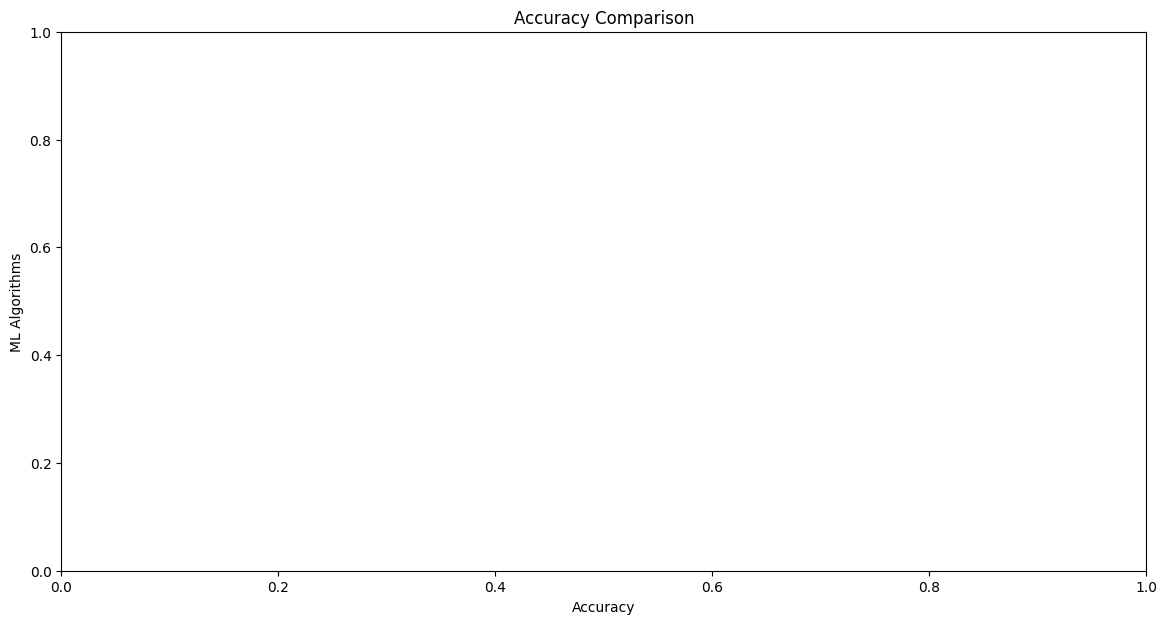

In [41]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(X = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')


# PREDICTIVE SYSTEM

In [42]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(X)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = crop_rf.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 



In [43]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")


Sorry are not able to recommend a proper crop for this environment


In [44]:
import pickle
pickle.dump(crop_rf,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

 



In [45]:
clf=GaussianNB()
clf.fit(X, y)
import pickle
from joblib import dump, load
dump(clf, 'GNBClassifier.pkl')


['GNBClassifier.pkl']